# Data Visualization of World Population By Countries Using Python

#### In real life, it is tough to get a complete clean dataset the way we need. The data we receive at times cannot be directly used in statistical or machine learning algorithms. We need to manipulate the raw data so that the the processed data can be used for further analysis and modeling purpose. 

#### To being with, we import the required libraries and read our dataset into Python. We use os package for operating system dependent functionality. We also use Numpy, Pandas, matplotlib, seaborn,sklearn and plotly package for data manipulation. 

#### We import required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.preprocessing import StandardScaler

import plotly.express as px

# How to do it...

#### We now read our data "world-population-by-country-2020.csv" from our current working directory

In [3]:
df = pd.read_csv('world-population-by-country-2020.csv')

#### Lets take a glance at our dataframe and see how it looks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       235 non-null    int64 
 1   Country (or dependency)  235 non-null    object
 2   Population 2020          235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density  (P/Km²)         235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           201 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


##### Sort the table for better understanding of columns and the values

In [5]:
df=df.sort_values('Population 2020',ascending=False)
df

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
159,160,Djibouti,"988,000",1.48%,"14,440",43,"23,180",900,2.8,27,79%,0.01%
199,200,Seychelles,"98,347",0.62%,608,214,460,-200,2.5,34,56%,0.00%
200,201,Antigua and Barbuda,"97,929",0.84%,811,223,440,0,2,34,26%,0.00%
14,15,Vietnam,"97,338,579",0.91%,"876,473",314,"310,070","-80,000",2.1,32,38%,1.25%
91,92,Honduras,"9,904,607",1.63%,"158,490",89,"111,890","-6,800",2.5,24,57%,0.13%
...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Estonia,"1,326,535",0.07%,887,31,"42,390","3,911",1.6,42,68%,0.02%
155,156,Timor-Leste,"1,318,445",1.96%,"25,326",89,"14,870","-5,385",4.1,21,33%,0.02%
156,157,Mauritius,"1,271,768",0.17%,"2,100",626,"2,030",0,1.4,37,41%,0.02%
157,158,Cyprus,"1,207,359",0.73%,"8,784",131,"9,240","5,000",1.3,37,67%,0.02%


### Data type conversion

#### Notice from the data definition that variables the data in column 'no' is of datatypes Integer restall rest all columns appear of datatype object(String) after importing the dataset. So here we convert the Object datatype to numerical (Integer & Float) datatype

#### Changing the datatypes from object(String) to numeric (integer and float)

In [6]:
df['Population 2020'] = df['Population 2020'].map(lambda e: e.replace(',',''))
df['Population 2020'] = df['Population 2020'].astype(int)

df['Yearly Change'] = df['Yearly Change'].map(lambda e: e[:-1])
df['Yearly Change'] = df['Yearly Change'].astype(float)

df['Density  (P/Km²)'] = df['Density  (P/Km²)'].map(lambda e: e.replace(',',''))
df['Density  (P/Km²)'] = df['Density  (P/Km²)'].astype(int)

df['Land Area (Km²)'] = df['Land Area (Km²)'].map(lambda e: e.replace(',',''))
df['Land Area (Km²)'] = df['Land Area (Km²)'].astype(int)

df['Migrants (net)'] = df['Migrants (net)'].astype(str)
df['Migrants (net)'] = df['Migrants (net)'].map(lambda e: e.replace(',',''))
df['Migrants (net)'] = df['Migrants (net)'].map(lambda e: '0' if e == 'nan' else e)
df['Migrants (net)'] = df['Migrants (net)'].astype(int)

df['Fert. Rate'] = df['Fert. Rate'].astype(str)
df['Fert. Rate'] = df['Fert. Rate'].map(lambda e: '0' if e=='N.A.' else e)
df['Fert. Rate'] = df['Fert. Rate'].astype(float)

df['Med. Age'] = df['Med. Age'].astype(str)
df['Med. Age'] = df['Med. Age'].map(lambda e: '0' if e=='N.A.' else e)
df['Med. Age'] = df['Med. Age'].astype(int)

df['Urban Pop %'] = df['Urban Pop %'].map(lambda e: e[:-1]).map(lambda e: e if e!='N.A' else '0').astype(int)
df['Urban Pop'] = (df['Population 2020'] * (df['Urban Pop %'] / 100)).astype(int)
df['Rural Pop'] = (df['Population 2020'] * (1-(df['Urban Pop %'] / 100))).astype(int)

df['World Share'] = df['World Share'].map(lambda e: e.replace('%','')).astype(float)

df['Net Change'] = df['Net Change'].map(lambda e: e.replace(',',''))
df['Net Change'] = df['Net Change'].astype(int)

#### Delete the null values from the table

In [7]:
df.drop('no',axis=1,inplace=True)

#### Check whether the datatypes hs been changed or not

In [8]:
df.dtypes

Country (or dependency)     object
Population 2020              int32
Yearly Change              float64
Net Change                   int32
Density  (P/Km²)             int32
Land Area (Km²)              int32
Migrants (net)               int32
Fert. Rate                 float64
Med. Age                     int32
Urban Pop %                  int32
World Share                float64
Urban Pop                    int32
Rural Pop                    int32
dtype: object

#### To know the number and name of columns in the dataset ".column" is used for using in various maps

In [9]:
df.columns

Index(['Country (or dependency)', 'Population 2020', 'Yearly Change',
       'Net Change', 'Density  (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Urban Pop',
       'Rural Pop'],
      dtype='object')

#  Heatmap for the dataset

### It is a visualization feature that present multiple rows from data in a way that make immediate sense by assigning different size and colors to cells each representing a row. The higher values are represented in the darker shades and the lesser values are represented in lighter shades

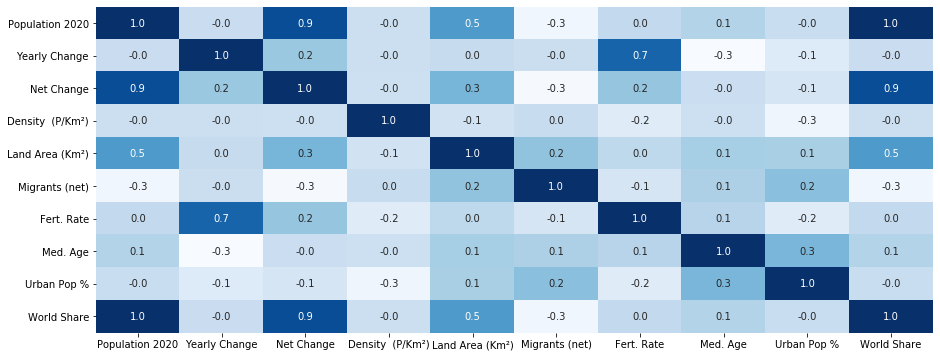

In [10]:
X = df.iloc[:,1:-2]
plt.figure(figsize=(15,6))
sns.heatmap(X.corr(),annot=True,cbar=False,cmap='Blues',fmt='.1f')
plt.show()

### From this graph we can see that the darker shade show the higher values and lighter shades shows the lesser values.
#### For example the intersection of population 2020 with itselfis the highest i.e. 1.0 but the Migrants (Net) and Population 2020 is -0.3 i.e. Population has no effect of Migrants same as Migrants has no effect on World Share but World Share has the higgest effect on Population i.e as Population increases the World share also increases. Here the degree of relationship is between the values (-1) to 1

# Piechart

#### Pie chart is used for checking the percentage of the column 'World Share' for each 'Country'

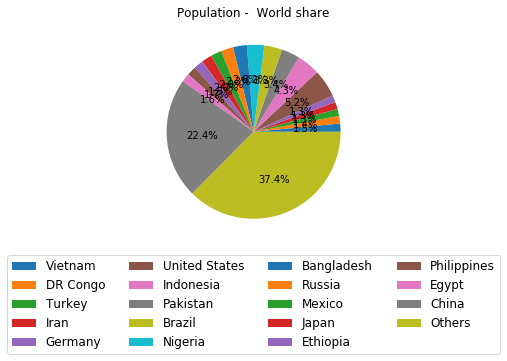

In [11]:
#pie chart

min_world_share = 1.0
countries = df[(df['World Share'] > min_world_share)]['Country (or dependency)'].values
countries.put(-1,'Others')
X = df[(df['World Share'] > min_world_share)]['World Share'].values
rest = 100-X.sum() 
X.put(-1,rest)
plt.pie(X,autopct = '%1.1f%%')
plt.legend(labels=countries, fontsize=12, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=4)

plt.title('Population -  World share')
plt.show()

#### The above chart is used to check the percentage of World Share of Population of countries. He we can see that China has the highest %  i.e. 22.4 % in World share and Vietnam has the lowest % i.e. approx 1.5% 

44 filas


C:\Users\HP\anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


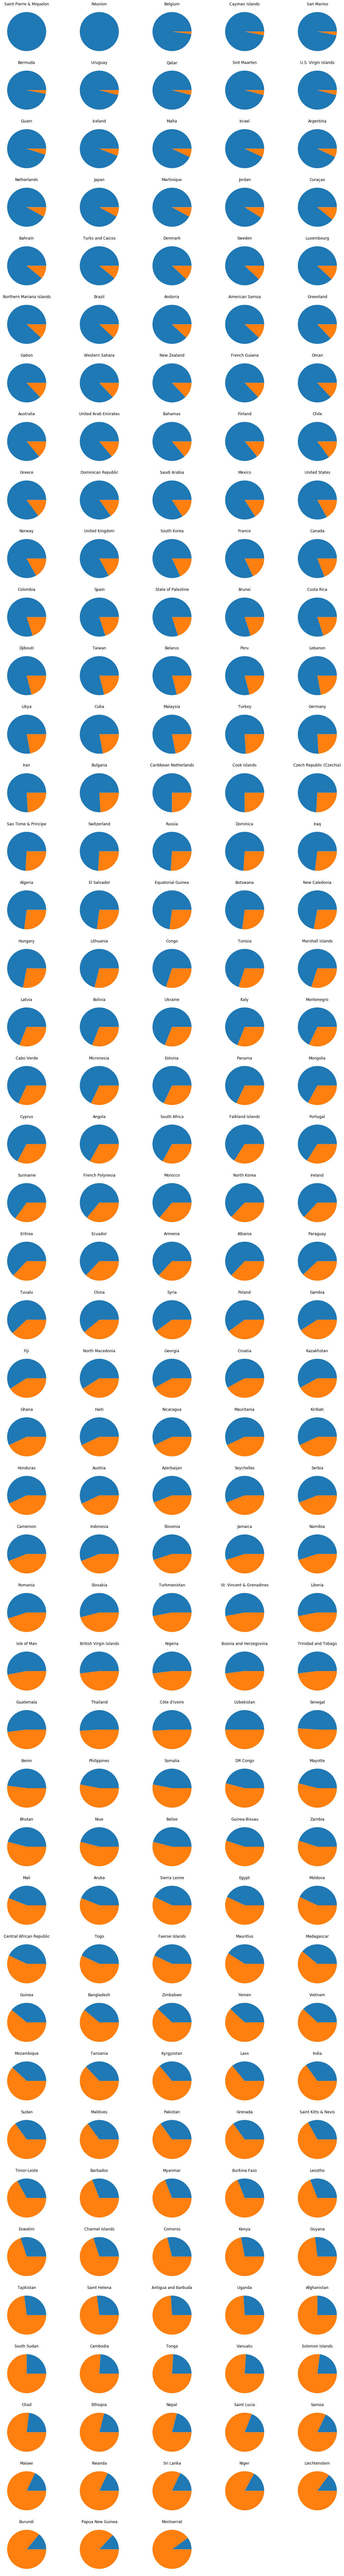

In [12]:
fig = plt.figure(figsize=(20,150))
columns = 5
rows = int(len(df[(df['Urban Pop %'] != 0)])/columns)+1
print(rows,'filas')
for i , val in enumerate(df.sort_values('Urban Pop %',ascending=False)[(df['Urban Pop %'] != 0)]['Country (or dependency)']):
    up = df[(df['Country (or dependency)'] == val)]['Urban Pop'].values[0]
    rp = df[(df['Country (or dependency)'] == val)]['Rural Pop'].values[0]
    X = up,rp
    f = fig.add_subplot(rows,columns,i+1)
    f.set_title(val)
    f.pie(X)
plt.show()

#### The above chart is for every individual country showing the relation between the urban and rural population. Here the Urban Population is shown in Blue color and the rural population is shown in Orange color. For Example we will talk about India, In India there is appro 70% population resides in Rural area and only 30% population resides in Urban Area. Uzbekistan has the 50-50 Population in both rural and Urban Area. and in montserrat the highest % of population resides in Rural Area.

# Exploratory Data Analysis

## Visualizing Data

#### Data visualization has gained even more importance today. Data visualization provides insights which one might not get from  numerical analysis

#### We now read our data "world-population-by-country-2020.csv" from our current working directory by removing the ',' from thousands place

In [13]:
df = pd.read_csv('world-population-by-country-2020.csv', thousands=',')

In [14]:
df = df.sort_values('Population 2020', ascending=False)

### Obtaining the Relation between Yearly Change and World Share using Scatter plot

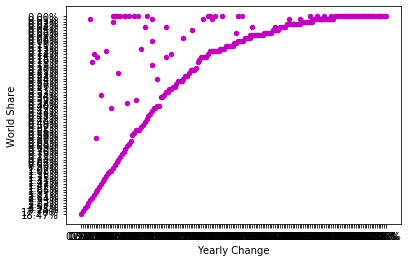

In [15]:
df.plot(kind="scatter",x="Yearly Change",y="World Share", color = 'm')
plt.show()

#### Scatter plots are extremely useful to analyze the relationship between two quantitative variables (Yearly Change and World Share) in our data set. Our datasets contain multiple quantitative and categorical variables and here we are interested in relationship between two quantitative variables - Yearly Change and World Share with respect to a third variable - Population 2020. So, from above graph  we can see that the value of World share increases with increase in population yearly.

## Top 20 largest populations 

In [16]:
df = df.sort_values('Population 2020', ascending=False)

In [17]:
df['Net Change'] = pd.to_numeric(df['Net Change'], errors='coerce')

In [18]:
df['Urban Pop %'] = df['Urban Pop %'].str.rstrip("%")
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'], errors='coerce')
df['Urban Pop %'] = df['Urban Pop %'].astype(float)/100

In [19]:
subset = df[:20].sort_values('Population 2020')

### Calculation for urban and rural pop.

In [20]:
subset['urban'] = subset['Population 2020'] * subset['Urban Pop %']
subset['rural'] = subset['Population 2020'] - subset['urban']
subset['urban'] = subset['urban'].round()
subset['rural'] = subset['rural'].round()

### Comparison between Urban and Rural Population

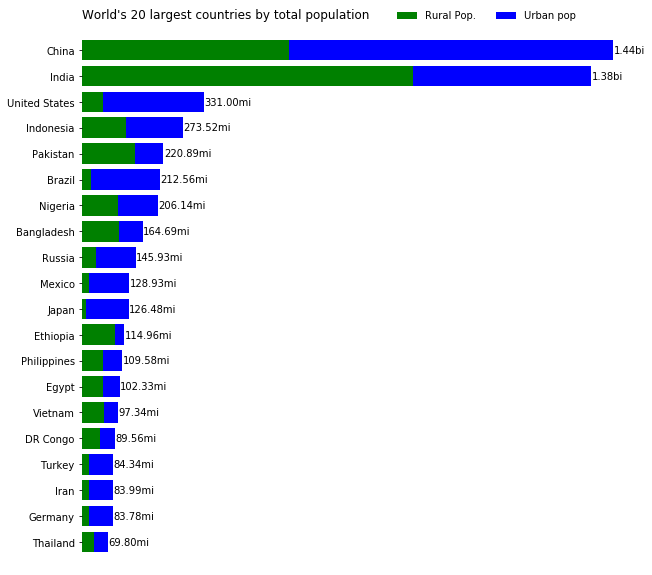

In [21]:
#plot
fig, ax = plt.subplots(1, figsize=(10,10))
ax.barh(subset['Country (or dependency)'], subset['rural'], color='Green')
ax.barh(subset['Country (or dependency)'], subset['urban'], left=subset['rural'], color='Blue')

# label bars with values
for idx, val in subset.iterrows():
    val = val['Population 2020']
    if(val > 10**9):
        plt.text(val+10**6, 19-idx,'{:,.2f}bi'.format(val/10**9), va='center')
    else:
        plt.text(val+10**6, 19-idx,'{:,.2f}mi'.format(val/10**6), va='center')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.ylim(-1,20)

# legend, title
plt.legend(['Rural Pop.', 'Urban pop'], ncol=2, loc='upper left', frameon=False, bbox_to_anchor=(.55,.9115), bbox_transform=fig.transFigure)
plt.title("World's 20 largest countries by total population", loc='left')

plt.show()

#### the above graph shows the Urban and Rural population of top 20 countries and their total population. The Urban population is shown in blue color and the rural population is shown in green color. We can see that in China the total populaton is 1.44 billion, in which the rural population is less than the Urban Population where as in India Rural population is more than the Urban population from 1.38 billion population. Japan has the highest population that resides in Urban Area from its total population of 126.48million and Ethiopia has the lowest population residing in Urban area from its total population of 114.96 million.

### Top 20 Countries by Net Change (Positive and Negative) for Rural and Urban Population

#### Get top 20 countries by Net Positive Change


In [22]:
subset_pos = df.sort_values('Net Change', ascending=False)[:20].sort_values('Net Change')

#### Get top 20 countries by Net Negative Change

In [23]:
subset_neg = df.sort_values('Net Change')[:20]

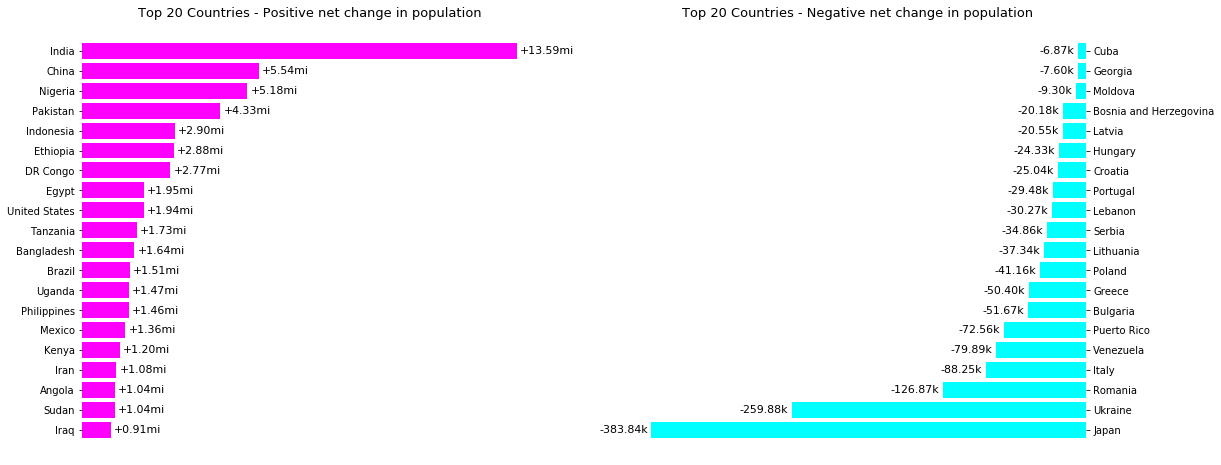

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.barh(subset_pos['Country (or dependency)'], subset_pos['Net Change'], color='magenta')
ax1.set_title('Top 20 Countries - Positive net change in population', loc='center', fontsize=13)

ax2.barh(subset_neg['Country (or dependency)'], subset_neg['Net Change'], color='cyan')
ax2.set_title('Top 20 Countries - Negative net change in population', loc='center', fontsize=13)
ax2.yaxis.tick_right()

for ax in (ax1, ax2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    
for i, val in enumerate(subset_pos['Net Change']):
    ax1.text(val+10**5, i,'+{:,.2f}mi'.format(val/10**6), va='center', fontsize=11)
    
for i, val in enumerate(subset_neg['Net Change']):
    ax2.text(val-15**3, i,'{:,.2f}k'.format(val/10**3), va='center', fontsize=11, ha='right')

plt.show()

#### the above graph shows the top 20 Positive and Negative Net Change of Population. The Graph in Magenta color shows the Top 20 countries which has the positive Net change of population in which India has the highest Net Change i.e. 13.59mi and The Graph in Cyan color shows the Negative Net Change of population in Which Japan has the least Net Change approx -383.84k   

# World-Map of Population by Migrants(Net) and Net Change# 

### Import graphical modules

In [25]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

### Map using Plotly by Migrants(Net)

In [26]:
valores = df['Migrants (net)'] # In this line you can select any numerical column 

data = dict(type = 'choropleth',
        locations = df['Country (or dependency)'],
        locationmode = "country names",
        colorscale='Cividis',
        z = valores,
        reversescale= True,
        text = df['Country (or dependency)'],
        colorbar = {'title' : valores.name}
        ) 
layout = dict(title = valores.name,
              geo = dict(showframe = False, 
                projection = {'type':'hyperelliptical'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

#### The above World Map shows the Migrants (Net) for different countries. The darker shade of Blue shows the highest number of Migrants and the lighter shade of Yellow shows the lowest number of Migrants. So we can see that US has 954.806k people migrating and  India has the least people migrating (-532.687k) due to increasing in population 

### Map using Plotly by Net Change

In [27]:
valores = df['Net Change'] # In this line you can select any numerical column 

data = dict(type = 'choropleth',
        locations = df['Country (or dependency)'],
        locationmode = "country names",
        colorscale='Cividis',
        z = valores,
        reversescale= True,
        text = df['Country (or dependency)'],
        colorbar = {'title' : valores.name}
        ) 
layout = dict(title = valores.name,
              geo = dict(showframe = False, 
                projection = {'type':'hyperelliptical'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

#### The above World Map shows the Net Change of Population for different countries. The darker shade of Blue shows the highest Net Change and the lighter shade of Yellow shows 0 net change. So we can see that India has the Net Change of Population of  13.58663M and Portugal has the Net Change of Population of (-29.478k) due to increasing in population.